Importere alle biblioteker som jeg har tengt å bruke.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Initialisere variabler som skal benyttes senere. `tid`og `ems` er lister, mens `eksponent` er bare en tall verdi. `eksponent` brukes til å gjøre **hele** grafen til større tall. Jeg vil anbefale *1e5* for denne gjør det mest leselig. `farger` er en liste med farger som skal brukes i grafen. Den kunne vært lengre, men må minst være 4 lang, den brukes for å få de samme fargene på hvert bilde av grafen.

In [2]:
tid = []
ems = []
eksponent = 1e5
farger = ["b","orange","g","r", "c", "m", "y", "k", "w"]

Lager en funksjon som plotter en plot, slik jeg vil den skal plottes, så sparer jeg tid hver gang jeg skal plotte noe.
Tar inn tre verdier, alle må være tekst, slik jeg får en tittel, x-akse navn og y-akse navn, og ingen feilmeldinger. Dette er tvunget og om jeg fører feil vil den enten gå til det jeg har satt som default, eller gi en feilmelding.

In [3]:
def do_plot(x_label: str = "X-verdier", y_label: str ="Y-verider", title: str = "Graf"):
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    legend = plt.legend(loc='upper left', shadow=True)
    plt.show()

Her leser jeg dataen fra førsøket. Dette gjør jeg med `open()`funksjonen, jeg legger så hver linje til i en liste, `lines`, og så lukker jeg filen, for å spare RAM, ordner sikkelige leserettigheter for filen (om et annet program skal benytte filen også) og det trengs ikke lenger at den er åpen.

In [4]:
dtf = open("induksjon_egen_23042024.csv", "r")
lines = dtf.readlines()
dtf.close()

Først starter jeg med å dele opp første linje, denne vet jeg er hvilket forsøk det er, 1, 2, 3 osv. Jeg deler så dette opp i en liste (`lables`). Jeg gjør det samme med linje to, (`sublables`). Etter dette fjerner jeg alle gjentagende elementer i `lables`, slik at jeg får en liste med unike verdier. Dette gjør jeg for å kunne telle hvor mange forsøk det er, og hvor mange variabler hvert forsøk har. Dette gjør ting mye lettere senere.
Jeg tar så for meg hvor mange verdier eller deler det er i hvert forsøk ved å dele lengden av `sublables` på lengden av `lables`.
Jeg finner så plasseringen til `"Spenning (V)"`, og denne benyttes senere. _**Denne er hardkodet, og må endres ved annen data.**_
Til slutt legger jeg til en tom liste i `ems`for hver tittel. Etter dette blir det brukt liste i lister og det kan bli komplekst å holde styr på.

In [5]:
lables = lines[0].strip().split(",")
sublables = lines[1].strip().split(",")
lables = list(dict.fromkeys(lables))
valsPerRun = int(len(sublables)/len(lables))
voltageIndex = sublables.index("Spenning (V)")

for i in range(len(lables)):
    ems.append([])

Her begynner jeg å ta ut den dataen jeg benytter. Jeg tar for meg alle linjer fra og med linje 2 ` lines[2:]`. Så tar jeg for meg hver rad, `row`, og så deler jeg hver av disse linjene ved `,`, så jeg står igjen med en liste ved hver verdi i linjen. Jeg legger så til tiden i listen `tid`, da tar jeg denne verdien fra `[1]`for den ligger på den *andre* kolonnen.
Så tar jeg for meg hver liste i `ems`, og legger til riktig verdi til riktig liste etter hvilken liste det er.

In [6]:
for row in lines[2:]:
    row = row.strip().split(",")
    tid.append(float(row[1]))
    for i in range(len(lables)):
        ems[i].append(float(row[i*valsPerRun + voltageIndex])* eksponent) #her har jeg ganget med 10^5 for å få det til noe som er lettere å lese av imens jeg jobber med dette.

Plot dataen for hver verdi i hver av `ems`.

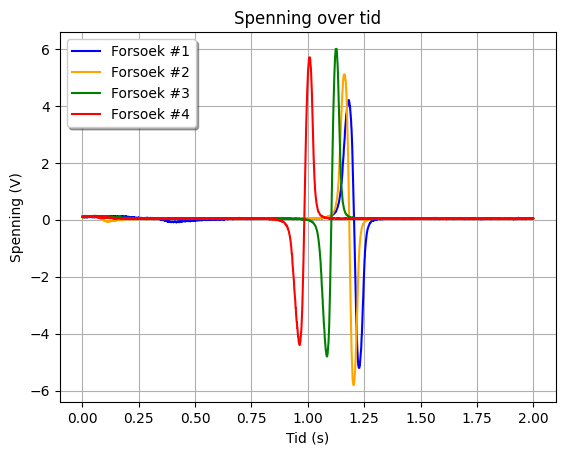

In [7]:
for i in range(len(ems)):
    plt.plot(tid, ems[i], label=lables[i], color=farger[i])
do_plot("Tid (s)", "Spenning (V)", "Spenning over tid")

# plt.plot(tid, ems[0], label=lables[0]) #dette bare for testing
# do_plot("Tid (s)", "Spenning (V)", "Spenning over tid")

Så skal jeg gjennomføre en integral på hver av de 4 forsøkene, og med dette finner jeg totale fluksen (Vs) for grafene:

Voltsekunder:  [0.45238132999999975, 0.4461483199999998, 0.4560899000000011, 0.4486856999999998]


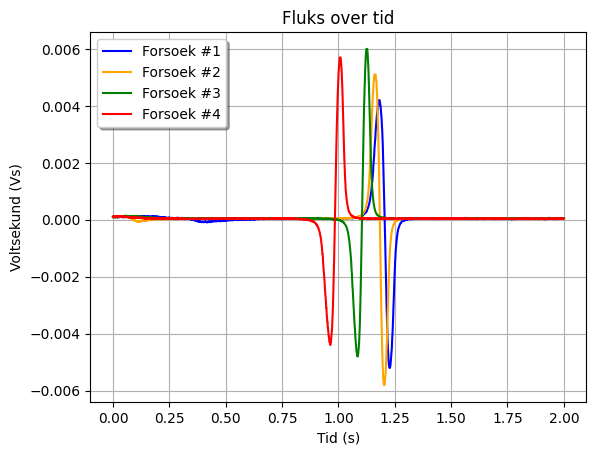

In [8]:
voltsekunder = []
voltsekund = []
for i in range(len(ems)):
    voltsekunder.append(0)
    voltsekund.append([])
    for j in range(len(ems[i])):
        voltsekunder[i] += abs(ems[i][j] * (0.001))
        voltsekund[i].append((ems[i][j] * (0.001)))
    
print("Voltsekunder: ", voltsekunder)
for i in range(len(voltsekund)):
    plt.plot(tid, voltsekund[i], label=lables[i], color=farger[i])
do_plot("Tid (s)", "Voltsekund (Vs)", "Fluks over tid")

Her gjør jeg derivasjon av dataene, og dette gir meg endringen av spenning over tid. Med dette kan jeg så finne monotoni egenskapene.

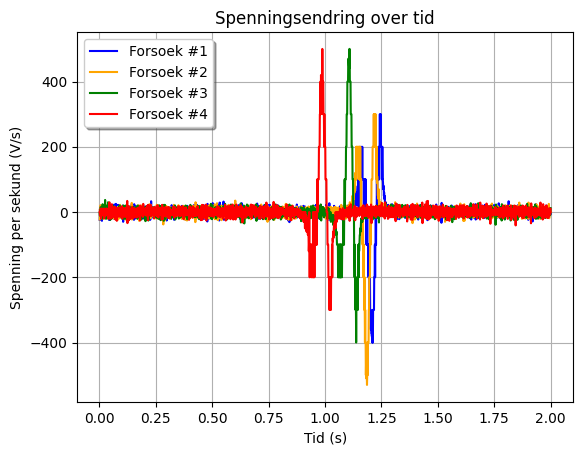

In [9]:
deriverte = []
for i in range(len(ems)):
    deriverte.append([])
    for j in range(len(ems[i])-1):
        deriverte[i].append((ems[i][j+1] - ems[i][j])/(tid[j+1]-tid[j])) #Numerisk derivasjon, Δy/Δx, siden jeg har kun punkter og ikke en funksjon
     
for i in range(len(deriverte)):
    plt.plot(tid[1:], deriverte[i], label=lables[i], color=farger[i])
do_plot("Tid (s)", "Spenning per sekund (V/s)", "Spenningsendring over tid")

def np_variant(): #Alternativ måte å gjøre det på, med numpy, men 
    deriverte = []
    for i in range(len(ems)):
        deriverte.append(np.gradient(ems[i], tid))
    for i in range(len(deriverte)):
        plt.plot(tid, deriverte[i], label=lables[i], color=farger[i])
    do_plot("Tid (s)", "Spenning per sekund (V/s)", "Spenningsendring over tid")

Her går jeg over hver eneste verdi i listene, og så sjekker jeg hvilke av disse punktene som er over eller under en toleranse. Dette gjør jeg for å finne ca. fortengslinje for hver av de 4 forsøkene.

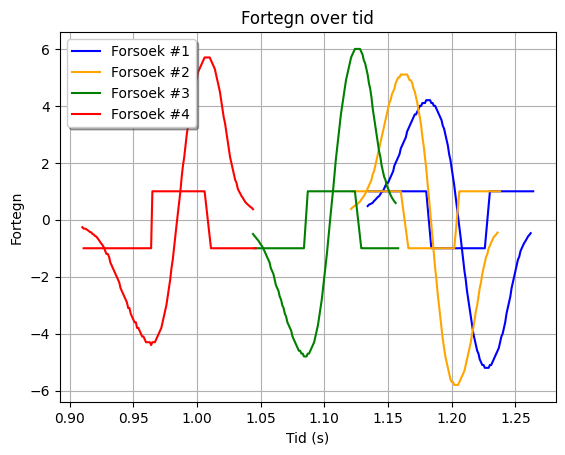

In [10]:
toleranse = 42 / 1e5 * eksponent #Denne verdiet er funnet igjennom testing og prøving, den er ikke nødvendigvis riktig for alle datasett. 

fortegn = []
tid_lok = []

fjernings_indekser = []
beholde_indekser = []

for j in range(len(deriverte)):
    fortegn.append([])
    tid_lok.append(tid[1:])
    fjernings_indekser.append([])
    beholde_indekser.append([])
    for i in range(len(deriverte[j])):
        if deriverte[j][i] > toleranse:
            fortegn[j].append(1 / 1e5 * eksponent)
        elif deriverte[j][i] < -toleranse:
            fortegn[j].append(-1 / 1e5 * eksponent)
        else:
            fortegn[j].append(0)

    for i, val in enumerate(fortegn[j]): # Enumerate retunerer indeksen til en verdi og selve verdien, derav i og val
        if val == 0:
            fjernings_indekser[j].append(i)
        else:
            beholde_indekser[j].append(i)
    
    for i in reversed(fjernings_indekser[j]): # Her er den reversed slik at vi fjerner fra slutten av lista, slik at indeksene ikke endrer seg.
        del tid_lok[j][i]
        del fortegn[j][i]


for i in range(len(fortegn)):
    plt.plot(tid_lok[i], fortegn[i], label=lables[i], color=farger[i])
    plt.plot(tid[beholde_indekser[i][0]:beholde_indekser[i][-1]], ems[i][beholde_indekser[i][0]:beholde_indekser[i][-1]], color=farger[i])
do_plot("Tid (s)", "Fortegn", "Fortegn over tid")

Så skal jeg prøve å finne ut hvilke av forsøkene som hadde samme utgangspunkt, og skrive dette ut.
Dette gjør jeg med å først finne hver endring av pluss og minus, legge disse til i en lise `pos_neg`, og så finne plasseringen av hvilke som er negative og postive, så skriver jeg index-plasseringen til `lables[i]` av disse, samt forklarende tekst.

In [11]:
pos_neg = []
start_pos = []

for i in range(len(fortegn)):
    pos_neg.append([])
    for j in range(len(fortegn[i])-1):
        if fortegn[i][j] != fortegn[i][j+1]:
            pos_neg[i].append(round(fortegn[i][j]*1e5/eksponent))
    pos_neg[i].append(round(fortegn[i][-1]*1e5/eksponent))
    for j in range(len(pos_neg[i])):
        if pos_neg[i][j] == 1 and j != len(pos_neg[i])-1:
            start_pos.append(j)

pos_av_neg = []
pos_av_pos = []
for i, val in enumerate(start_pos):
    if val == 0:
        pos_av_neg.append(i)
    else:
        pos_av_pos.append(i)

print("Forsøkene:", ", ".join([lables[index] for index in pos_av_neg]), "starter med det samme fortegnet")
print("Forsøkene:", ", ".join([lables[index] for index in pos_av_pos]), "starter med det samme fortegnet")

Forsøkene: Forsoek #1, Forsoek #2 starter med det samme fortegnet
Forsøkene: Forsoek #3, Forsoek #4 starter med det samme fortegnet
